<a href="https://colab.research.google.com/github/csbfx/apex/blob/main/Answer_Key_APEX_Biology_Activity_Module_Phenology_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Analysis with Python Programming: Phenology Oak Trees in California

Author: Wendy Lee and Jennifer Avena
Last Modified: August 8, 2023

<img src="https://static.inaturalist.org/projects/5896-cover.png?1466301609">

<font color=gray size=1>Image credit: [inaturalist.org](www.inaturalist.org)</font>

Have you ever wondered if Oak trees in California release pollen during the spring, which is when seasonal allergies are most common? Furthermore, do specific types of Oak trees in California show a preference for coastal climates over inland ones? In this module, we will utilize phenometric data from the USA National Phenology Network (USA-NPN) to generate a graph that displays the pollen release patterns of Oak trees in California. Additionally, we will construct interactive maps to illustrate the geographic distribution of various Oak species in California.

Phenometric data refers to quantitative measurements or data collected during the study of phenology, which is the timing of recurring biological events in relation to changing environmental conditions. Phenology involves observing and recording the timing of events such as plant flowering, leaf emergence, bird migrations, and insect life cycles.

Observational data for the USA-NPN (USA National Phenology Network) are gathered on-site by both citizen and professional observers. They adhere to standardized protocols and utilize the Nature's Notebook platform. These data span from 2009 to the present day and are available in four formats or data types: Status & Intensity, Individual Phenometrics, Site Phenometrics, and Magnitude Phenometrics. The figure below provides an overview of the distinctions, while the succeeding sections offer detailed information about each type. For a comprehensive understanding of the USA-NPN approach and guidelines for working with each data type, refer to the following [documentation](https://pubs.usgs.gov/of/2018/1060/ofr20181060.pdf).

For Exercise 1, we will use the Magnitude Phenometric data from the USA-NPN (https://data.usanpn.org/observations/) and they are stored in a comma-separated value (CSV) file stored in this Git repository: `https://raw.githubusercontent.com/csbfx/apex/main/data/magnitude_phenometrics_data.csv`


*Side note*: What is a Git repository?  
A Git repository is a data structure used by the distributed version control system called Git. In software development, a repository is a place where code and other project files are stored, tracked, and managed. It allows multiple developers to collaborate on a project while maintaining a history of changes and versions.

## Learning Outcomes:
After completing this module, you will be able to   
1. Analyze and filter tabular data.
2. Visualize time series data to observe trends.
3. Use geospatial data to show the locations on a map.



# Exercise 1 - Examine how much pollen was released in each month for a selected group of years

## Obtain data from the git repository and store it in a Python Pandas DataFrame.

A Pandas DataFrame is a two-dimensional data structure in the Python programming language, consisting of rows and columns. It is a core component of the [Pandas library](https://pandas.pydata.org/docs/user_guide/index.html#user-guide) and is used to represent tabular data, such as spreadsheets or databases, in a structured manner.

DataFrames are highly flexible, capable of handling various data types, including numerical, categorical, and text data. They also provide extensive functionality for data manipulation, aggregation, and filtering, making them a popular tool for data analysis and data science tasks.

In a Pandas DataFrame, the rows represent observations or records, while the columns represent features or variables. Each column has a unique name and can be accessed and manipulated individually.

## Load data into a DataFrame
First, we will need to `import` Pandas and use `pd` as an alias by running this line of code:

> `import pandas as pd`

In programming, an alias refers to an alternate name or identifier that can be used to refer to a specific variable, function, type, module, or any other programming entity. Aliases are often used to make code more readable.

Second, we will use the Pandas <font color=darkorange>*function*</font> `read_csv()` to read the data from the csv file and store them in a Pandas DataFrame <font color=darkorange>*object*</font>. This function returns the DataFrame object which is then stored in a variable called `df`.

> `df = pd.read_csv("https://raw.githubusercontent.com/csbfx/apex/main/magnitude_phenometrics_data.csv")`

**What is a <font color=darkorange>function</font>?**
In programming, a *function* typically performs an operation or returns a value. In this case, the `read_csv()` function reads the data from the csv file and returns a Pandas DataFrame object that contains the data.

**What is an <font color=darkorange>object</font>?**
In programming, an *object* is a thing that has properties and can do things. For example, think of a car. A car is an object that has properties, as known as attributes, such as color, make, model, and year. It can also do things, aka with functions, like drive, turn, and stop.

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/csbfx/apex/main/data/magnitude_phenometrics_data.csv')
df

Species_ID    Genus    Species          Common_Name  Kingdom  \
0            100  Quercus       alba            white oak  Plantae   
1            100  Quercus       alba            white oak  Plantae   
2            100  Quercus       alba            white oak  Plantae   
3            100  Quercus       alba            white oak  Plantae   
4            100  Quercus       alba            white oak  Plantae   
...          ...      ...        ...                  ...      ...   
7278         757  Quercus  douglasii             blue oak  Plantae   
7279         316  Quercus   garryana     Oregon white oak  Plantae   
7280         704  Quercus     lobata           valley oak  Plantae   
7281         705  Quercus  agrifolia  California live oak  Plantae   
7282         757  Quercus  douglasii             blue oak  Plantae   

      Phenophase_ID             Phenophase_Description  Year  Start_Date  \
0               196  Full pollen release (angiosperms)  2009  2009-03-26   
1               502           Pollen release (flowers)  2009  2009-03-26   
2               196  Full pollen release (angiosperms)  2009  2009-04-02   
3               502           Pollen release (flowers)  2009  2009-04-02   
4               196  Full pollen release (angiosperms)  2009  2009-04-09   
...             ...                                ...   ...         ...   
7278            501                       Open flowers  2021  2021-12-24   
7279            502           Pollen release (flowers)  2021  2021-12-24   
7280            502           Pollen release (flowers)  2021  2021-12-24   
7281            502           Pollen release (flowers)  2021  2021-12-24   
7282            502           Pollen release (flowers)  2021  2021-12-24   

        End_Date  ...  Mean_NumAnimals_In-Phase  SE_NumAnimals_In-Phase  \
0     2009-04-01  ...                     -9999                   -9999   
1     2009-04-01  ...                     -9999                   -9999   
2     2009-04-08  ...                     -9999                   -9999   
3     2009-04-08  ...                     -9999                   -9999   
4     2009-04-15  ...                     -9999                   -9999   
...          ...  ...                       ...                     ...   
7278  2021-12-31  ...                     -9999                   -9999   
7279  2021-12-31  ...                     -9999                   -9999   
7280  2021-12-31  ...                     -9999                   -9999   
7281  2021-12-31  ...                     -9999                   -9999   
7282  2021-12-31  ...                     -9999                   -9999   

      In-Phase_per_Hr_Sites_Sample_Size  \
0                                 -9999   
1                                 -9999   
2                                 -9999   
3                                 -9999   
4                                 -9999   
...                                 ...   
7278                              -9999   
7279                              -9999   
7280                              -9999   
7281                              -9999   
7282                              -9999   

      In-Phase_per_Hr_Site_Visits_Sample_Size  \
0                                       -9999   
1                                       -9999   
2                                       -9999   
3                                       -9999   
4                                       -9999   
...                                       ...   
7278                                    -9999   
7279                                    -9999   
7280                                    -9999   
7281                                    -9999   
7282                                    -9999   

      Mean_NumAnimals_In-Phase_per_Hr  SE_NumAnimals_In-Phase_per_Hr  \
0                               -9999                          -9999   
1                               -9999                          -9999   
2                            

## Examine the data

### 1. What are the column headers in this data set?

There is a simple method to display all the column names in this dataset without the need to horizontally scroll through the many columns. Pandas DataFrame has an <font color=darkorange>*attribute*</font>, `columns`, that stores the list of column names.

**What is an <font color=blue>attribute</font>**?
An attribute holds a value or state associated with an object.

In this case, the `columns` attribute of the Pandas DataFrame object `df` holds the list of column names.

In [ ]:
# Show all the column in the dataset
df.columns

Index(['Species_ID', 'Genus', 'Species', 'Common_Name', 'Kingdom',
       'Phenophase_ID', 'Phenophase_Description', 'Year', 'Start_Date',
       'End_Date', 'Status_Records_Sample_Size', 'Individuals_Sample_Size',
       'Sites_Sample_Size', 'Num_Yes_Records',
       'NumIndividuals_with_Yes_Record', 'NumSites_with_Yes_Record',
       'Proportion_Yes_Records', 'Proportion_Individuals_with_Yes_Record',
       'Proportion_Sites_with_Yes_Record', 'In-Phase_Sites_Sample_Size',
       'In-Phase_Site_Visits_Sample_Size', 'Total_NumAnimals_In-Phase',
       'Mean_NumAnimals_In-Phase', 'SE_NumAnimals_In-Phase',
       'In-Phase_per_Hr_Sites_Sample_Size',
       'In-Phase_per_Hr_Site_Visits_Sample_Size',
       'Mean_NumAnimals_In-Phase_per_Hr', 'SE_NumAnimals_In-Phase_per_Hr',
       'In-Phase_per_Hr_per_Acre_Sites_Sample_Size',
       'In-Phase_per_Hr_per_Acre_Site_Visits_Sample_Size',
       'Mean_NumAnimals_In-Phase_per_Hr_per_Acre',
       'SE_NumAnimals_In-Phase_per_Hr_per_Acre'],
      

### 2. What kind of phenophases are present in this data set? <a name='unique'></a>

From the column names, we noticed that there is a column called **`Phenophase_Description`**. A phenophase is a distinct stage or event in the life cycle of a plant or animal that is used in the study of phenology. Phenophases are specific points or periods within the life cycle of an organism that are used as reference points for tracking and comparing the timing of events. We can use a function `unique()` to identify all the unique values in the `Phenophase_Description` column.

In [ ]:
df.Phenophase_Description.unique()

array(['Full pollen release (angiosperms)', 'Pollen release (flowers)',
       'Flowers or flower buds', 'Open flowers'], dtype=object)

Let's take a look at the line of code we just ran. Here, the first part of the code, `df.Phenophase_Description`, is for extracting the column
`Phenophase_Description` from the DataFrame `df`. A column of a DataFrame is an object known as <font color=darkorange>**Series**</font> in Pandas. `unique()` is a function of a Series object which returns an array of unique values stored in the `Phenophase_Description` column.

## Check-in Question

In this dataset, how many years does it cover? Hint: apply the `unique()` function on the DataFrame column `df.Year` in the following code cell as shown [above](#unique).

In [ ]:
# Check-in Question - In this dataset, how many years does it cover?

# Your code here . . .

In [ ]:
# @title Check your answer
# Check-in Question - In this dataset, how many years does it cover?
# Solution:
df.Year.unique()



array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021])

## Extract data of interest from the DataFrame, `df`

Let's focus on the data collected for **Pollen release (flowers)**. Here, we will extract data that has the value "Pollen release (flowers)" in the `Phenophase_Description` column from the DataFrame `df`.

Here is the syntax for extracting/filtering data from a dataframe:

> `dataframe[(a boolean expression)]`

> Example: `df[(df.Phenophase_ID == 502)]`

**What is a <font color=orange>conditional statement**</font>? In programming, a Boolean expression is a statement that can either be true or false.

In this case, our boolean expression would be checking if the values in the `Phenophase_Description` column equal to "Pollen release (flowers)":
> `df.Phenophase_Description == "Pollen release (flowers)"`

Note that, in Python, a double-equal `==` is used for checking for equality. A single `=` is for assigning a value to a variable.

The data from this filtering step will be stored in a DataFrame, and we will assign this DataFrame to a variable called `pollen`.

In [ ]:
# Filter the pollen release data using the boolean expression
# Phenophase_Description == "Pollen release (flowers)".

pollen = df[(df.Phenophase_Description == "Pollen release (flowers)")]

# view the content stored in the variable pollen
pollen

Species_ID    Genus    Species          Common_Name  Kingdom  \
1            100  Quercus       alba            white oak  Plantae   
3            100  Quercus       alba            white oak  Plantae   
5            100  Quercus       alba            white oak  Plantae   
7            100  Quercus       alba            white oak  Plantae   
9            100  Quercus       alba            white oak  Plantae   
...          ...      ...        ...                  ...      ...   
7270         705  Quercus  agrifolia  California live oak  Plantae   
7279         316  Quercus   garryana     Oregon white oak  Plantae   
7280         704  Quercus     lobata           valley oak  Plantae   
7281         705  Quercus  agrifolia  California live oak  Plantae   
7282         757  Quercus  douglasii             blue oak  Plantae   

      Phenophase_ID    Phenophase_Description  Year  Start_Date    End_Date  \
1               502  Pollen release (flowers)  2009  2009-03-26  2009-04-01   
3               502  Pollen release (flowers)  2009  2009-04-02  2009-04-08   
5               502  Pollen release (flowers)  2009  2009-04-09  2009-04-15   
7               502  Pollen release (flowers)  2009  2009-05-07  2009-05-13   
9               502  Pollen release (flowers)  2009  2009-06-11  2009-06-17   
...             ...                       ...   ...         ...         ...   
7270            502  Pollen release (flowers)  2021  2021-12-17  2021-12-23   
7279            502  Pollen release (flowers)  2021  2021-12-24  2021-12-31   
7280            502  Pollen release (flowers)  2021  2021-12-24  2021-12-31   
7281            502  Pollen release (flowers)  2021  2021-12-24  2021-12-31   
7282            502  Pollen release (flowers)  2021  2021-12-24  2021-12-31   

      ...  Mean_NumAnimals_In-Phase  SE_NumAnimals_In-Phase  \
1     ...                     -9999                   -9999   
3     ...                     -9999                   -9999   
5     ...                     -9999                   -9999   
7     ...                     -9999                   -9999   
9     ...                     -9999                   -9999   
...   ...                       ...                     ...   
7270  ...                     -9999                   -9999   
7279  ...                     -9999                   -9999   
7280  ...                     -9999                   -9999   
7281  ...                     -9999                   -9999   
7282  ...                     -9999                   -9999   

      In-Phase_per_Hr_Sites_Sample_Size  \
1                                 -9999   
3                                 -9999   
5                                 -9999   
7                                 -9999   
9                                 -9999   
...                                 ...   
7270                              -9999   
7279                              -9999   
7280                              -9999   
7281                              -9999   
7282                              -9999   

      In-Phase_per_Hr_Site_Visits_Sample_Size  \
1                                       -9999   
3                                       -9999   
5                                       -9999   
7                                       -9999   
9                                       -9999   
...                                       ...   
7270                                    -9999   
7279                                    -9999   
7280                                    -9999   
7281                                    -9999   
7282                                    -9999   

      Mean_NumAnimals_In-Phase_per_Hr  SE_NumAnimals_In-Phase_per_Hr  \
1                               -9999                          -9999   
3                               -9999                          -9999   
5                               -9999                          -9999   
7                               -9999                          -9

## Let's analyze the quantity of pollen released in each month over a selected range of years and make comparisons. <a name="convert_month"></a>

In this dataset, the month information is embedded in the `Start_Date` and `End_Date` columns. Run the following code cell to extract the "Month" data from the pollen DataFrame and convert the numerical month values into their corresponding three-letter abbreviations.






In [ ]:
# Extract the month from the Start_Date and convert the numerical months to the three letter abbreviations.
import calendar

# Step 1: Convert the values in the State_Date column into Pandas datetime objects
p_start_date = pd.to_datetime(pollen.Start_Date)

# Step 2: Extract the month attribute from the datatime objects
month = p_start_date.map(lambda x: x.month)

# Step 3: Convert the month values into 3-letter abbreviations
month_name = month.apply(lambda x: calendar.month_abbr[x])
month_name

1       Mar
3       Apr
5       Apr
7       May
9       Jun
       ... 
7270    Dec
7279    Dec
7280    Dec
7281    Dec
7282    Dec
Name: Start_Date, Length: 2428, dtype: object

### Let's take a closer look at the code for each steps:

Step 1. In Pandas, the datetime object is a data type used to represent dates and times. It is a powerful tool for working with time-series data in Python. We will use a Pandas function `to_datetime()` to convert the values stored in the `Start_Date` column into Pandas `datetime` objects.

> `p_start_date = pd.to_datetime(pollen.Start_Date)`

> Note that the variable, `p_start_date`, is now storing a **Series** that contains all the `datetime` objects corresponding to each of the value stored in the `Start_Date` column. A **Series** can be thought of as a column in a DataFrame or a single-dimensional array with associated labels, which are referred to as the index.

Step 2. With a `datetime` object, we can perform a wide range of operations on it. For example, we can extract individual components (such as year or month) using the year, month, and day attributes. In our case, we will extract the month attributes.

> `month = p_start_date.map(lambda x: x.month)`

Step 3. Transform the month values stored in the variable `month` into 3-letter month abbreviations.

> `month_name = month.apply(lambda x: calendar.month_abbr[x])`

**What are the functions <font color=darkorange>`map()`</font> and <font color=darkorange>`apply()`</font>?**
In Pandas, `map()` and `apply()` are two functions that are commonly used for data transformation.

- `map()` is a function that applies a function to each element of a Pandas Series. The output of the function is a new Series with the same length as the original.

- `apply()` is similar to `map()`, but it applies a function to each element of a DataFrame or a Series along a specified axis. This allows you to perform more complex operations on your data.

## Generate a time-series graph illustrating the amount of pollen released during each month across a chosen set of years.

Run the following code cell to create a Pandas DataFrame with the data we need to create the time-series plot.

In [ ]:
# Step 1: Create a dataframe that contains the Level of Pollen Release (flowers) and Year columns for plotting.
p_df = pollen[['Proportion_Yes_Records','Year']]

# Step 2: Rename the column Proportion_Yes_Records to Level of Pollen Release (flowers)
p_df = p_df.rename({'Proportion_Yes_Records':'Level of Pollen Release (flowers)'}, axis=1)

# Step 3: Add the Month column with the 3-letter abbrev. to the dataframe p_df
p_df.insert(2, "Month", month_name, True)
p_df

Level of Pollen Release (flowers)  Year Month
1                                  0.00  2009   Mar
3                                  0.00  2009   Apr
5                                  0.00  2009   Apr
7                                  1.00  2009   May
9                                  1.00  2009   Jun
...                                 ...   ...   ...
7270                               0.00  2021   Dec
7279                               0.00  2021   Dec
7280                               0.00  2021   Dec
7281                               0.04  2021   Dec
7282                               0.00  2021   Dec

[2428 rows x 3 columns]

###Let's examine the purpose of each individual step.:

1. To create the time-series plot, we will need to extract two specific columns from the pollen DataFrame: `Proportion_Yes_Records` and `Year`. According to USGS, `Proportion_Yes_Records` stands for *Number of “Yes” records divided by number of all “Yes” and “No” records.* More information can be found on page 16 of the [USGS document](https://pubs.usgs.gov/of/2018/1060/ofr20181060.pdf).  To do this, we can use the following syntax, which extracts multiple columns and creates a new DataFrame:

> `dataframe[[column_name1,column_name2]]`

> Example: `pollen[['Proportion_Yes_Records','Year']]`


2. In the dataframe, the `Proportion_Yes_Records` column contains values that indicate the extent to which the observed phenophase, namely `Pollen Release (flower)`, is expressed over time. To enhance clarity and relevance, we will rename the `Proportion_Yes_Records` column to `Level of Pollen Release (flowers)` using the DataFrame function `rename()`. Here is the syntax:

> `dataframe.rename({'old_name':'new_name'}, axis=1)`

> Example: `p_df.rename({'Proportion_Yes_Records':'Level of Pollen Release (flowers)'}, axis=1)`

> Note that `axis=1` in the `rename()` function indicates the rename is for the column name.

3. Add the 3-letter month column to this new DataFrame using the DataFrame function `insert()`. Here is the syntax:

> `dataframe.insert(insertion_location, column_name, value, allow_duplicates=True/False)`

> Example: `p_df.insert(2, "Month", month_name, True)` where `month_name` is a Series that contains the 3-letter month abbreviations in [Step 3](#convert_month) above. The `insertion_location` is 2, which is the 3rd column. Python position always starts from 0, therefore, the 3rd column has position number 2.

## Generate the  plot to show the Level of Pollen Release over time for the year 2012, 2015, 2018, and 2021.

[Seaborn](https://seaborn.pydata.org/) is a data visualization library for Python that is often used in conjunction with Pandas. Seaborn provides a high-level interface for creating informative and attractive statistical graphics, and is built on top of the popular visualization library, [Matplotlib](https://matplotlib.org/).

First, we need to first import all the Python libraries required for generating the visualization:
> `import seaborn as sns`  
> `import matplotlib.pyplot as plt`  
> `from pandas.api.types import CategoricalDtype`

The final import statement above enables us to create a custom categorical data type for our "Month" data, which ensures that the month values are sorted chronologically instead of alphabetically.

## Displaying plot directly in the Colab notebook

When we execute `%matplotlib inline` in a Colab notebook cell, it tells the notebook to display any plots generated by Matplotlib directly in the output cell below the code cell. This allows you to view the plot immediately without having to open a separate window or save the plot to a file.




Here are the steps for creating the visualization:
1. Define a categorical data type using a list that includes the 3-letter abbreviations of the month values arranged in chronological order. After defining the new data type, we can convert the Month column of the p_df DataFrame to use this data type.

> `months=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]`  
> `p_df["Month"].astype(CategoricalDtype(categories=months,ordered=True))`


2. We filter the data from the DataFrame `p_df` to only contain data for the years 2012, 2015, 2018, and 2021. The years chosen here are arbitrary. The filtered results will be stored in a DataFrame called `dd1`. <a name="filter"></a>

> `dd1 = p_df[p_df.Year.isin([2012,2015,2018,2021])]`


3. Lastly, we use Seaborn `relplot()` to generate the time-series visualization. In Seaborn, the `relplot()` function is used to create a relational plot, which is a versatile type of plot designed to visualize the relationships between two or more variables in a dataset. In this case, we are looking at the relationship between `Level of Pollen Release (flowers)` and `Month`. <a name="relplot"></a>

> `sns.relplot(`  
>&nbsp;&nbsp;&nbsp;&nbsp;`data=dd1,`  
>&nbsp;&nbsp;&nbsp;&nbsp;`x="Month",`  
>&nbsp;&nbsp;&nbsp;&nbsp;`y="Level of Pollen Release (flowers)",`  
>&nbsp;&nbsp;&nbsp;&nbsp;`aspect=3,`  
>&nbsp;&nbsp;&nbsp;&nbsp;`height=4,`  
>&nbsp;&nbsp;&nbsp;&nbsp;`hue="Year",`  
>&nbsp;&nbsp;&nbsp;&nbsp;`kind="line",`  
>&nbsp;&nbsp;&nbsp;&nbsp;`palette="viridis"`  
>`)`  
> `plt.title("""Pollen released by oak trees in California in 2012, 2015, 2018, and 2021""");`

Here, we set `kind="line"`. `relplot()` can plot "scatter" or "line" plot. For more information, check out the [Seaborn documentation page](https://seaborn.pydata.org/generated/seaborn.relplot.html). We set `hue="Year"` to use different colors to represent the plot for different years. Seaborn comes with many [different color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html). For this plot, we set `palette="viridis"`.



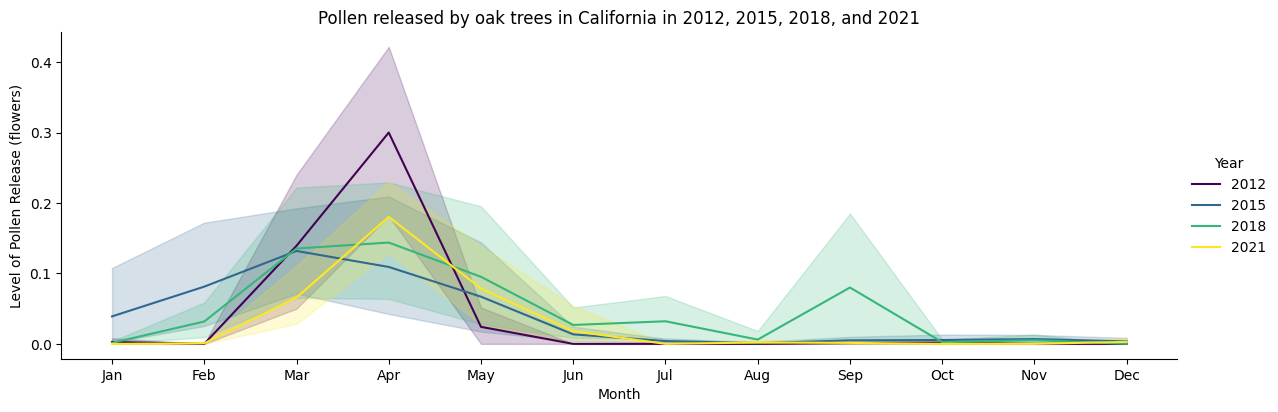

In [ ]:
## Make a line plot that shows the Level of Pollen Release (flowers) by month for 2012, 2015, 2018, and 2021.

from pandas.api.types import CategoricalDtype
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

months=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

p_df["Month"].astype(CategoricalDtype(categories=months,ordered=True))

dd1 = p_df[p_df.Year.isin([2012,2015,2018,2021])]

sns.relplot(
    data=dd1,
    x="Month",
    y="Level of Pollen Release (flowers)",
    aspect=3,
    height=4,
    hue="Year",
    kind="line",
    palette="viridis"
)
plt.title("""Pollen released by oak trees in California in 2012, 2015, 2018, and 2021""");


##Check-in Question:
It appears that the amount of pollen release are equally low in October, November, and December. Let's further filter the data to focus on the pollen release in the fall. In the previous [step 2](#filter), we run the code `dd1 = p_df[p_df.Year.isin([2012,2015,2018,2021])]` to filter data for Years 2012, 2015, 2018, 2021 and store the results in a DataFrame called `dd1`. In the code cell below, use the DataFrame `dd1` and the `isin()` method to further filter by month and store the results in a DataFrame called `dd2`.

In [ ]:
# Replace XXX with your own code

# Filter the data to only contain months "Oct", "Nov", and "Dec" using the DataFrame dd1
dd2 = dd1[dd1.XXX.XXX(["Oct",XXX,XXX])]

# Diplay the DataFrame dd2
dd2

In [ ]:
# @title Check your answer
# Filter the data to only contain months "Oct", "Nov", and "Dec" using the DataFrame dd1
dd2 = dd1[dd1.Month.isin(["Oct", "Nov", "Dec"])]
dd2

### Generate a plot to examine the pollen release level for the months of "Oct", "Nov", and "Dec" using the filtered data stored in DataFrame `dd2`.

Run the following code cell to see examine the pollen release level for Oct, Nov, and Dec. In this plot, we use the same `relplot` settings as [the previous plot](#relplot), but we choose not to use `hue="Year"` to separate the plots by year since we just want to see the overall trend.

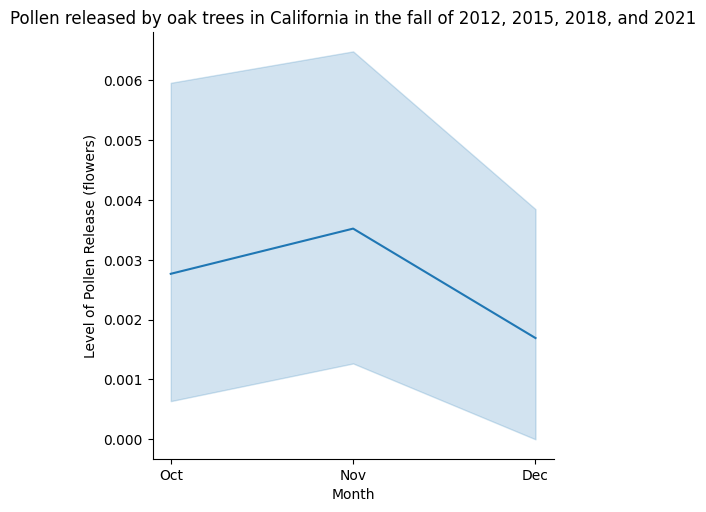

In [ ]:
sns.relplot(data=dd2, y="Level of Pollen Release (flowers)", x="Month", kind="line");
plt.title("""Pollen released by oak trees in California in the fall of 2012, 2015, 2018, and 2021""");

# Exercise 1 Check-in Questions:

Instructions: Edit text or code cells below to respond to the following questions:

### **Question 1**: Based on the pollen release data for California in the years 2012, 2015, 2018, and 2021, which month had the highest levels of pollen release? ##

*   Your answer here:

<font color=blue>Answer: April consistently had the highest level of pollen release throughout the observed years. Oak trees in California typically experience the highest pollen release during the spring months, particularly from March to May. These months coincide with the oak tree flowering and reproductive periods, leading to higher pollen levels in the air.</font>

### **Question 2**: Based on the pollen release data for California in the years 2012, 2015, 2018, and 2021, which month had the lowest levels of pollen release? ##

*   Your answer here:

<font color=blue>Answer: December consistently had the lowest level of pollen release.</font>

### **Question 3**: Can you propose reasons for the spike in Apr during 2012 and the peak in Sep for 2018?

*   Your answer here:

<font color=blue>Answer: Pollen release can vary based on the specific type of oak tree, local climate conditions, and other factors.</font>

### **Question 4**: Observe the plot above and take note of the solid thin lines surrounded by shaded regions. Do you know what these shaded regions might represent? ##

*   Your answer here:

<font color=blue>Answer: In Seaborn's relplot, the solid line represents the central tendency of the data, while the shaded areas around the line represent the confidence interval, which is a measure of the uncertainty around the estimate of the central tendency. The width of the shaded region indicates the level of confidence, with wider shaded regions indicating higher levels of uncertainty.</font>

### **Question 5**: In the code cell below, create your own plot with 4 years of your choice to compare the monthly pollen release levels. You can refer to the [code](#relplot) for the plot we created earlier.



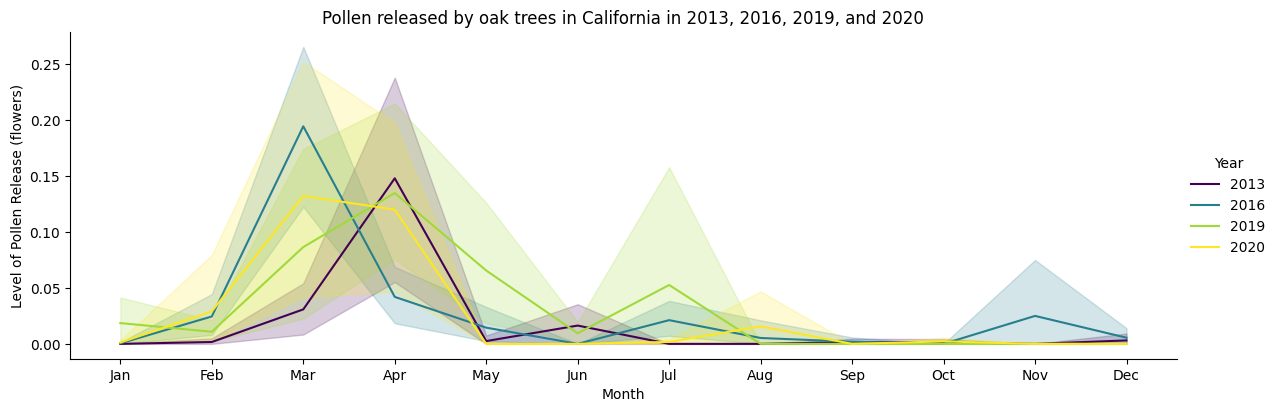

In [ ]:
## Check-in Question 5:

## Your code here.

## Solution:

## Make a line plot that shows the Level of Pollen Release (flowers) by month for 2013, 2016, 2019, and 2020.

from pandas.api.types import CategoricalDtype
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

months=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

p_df["Month"].astype(CategoricalDtype(categories=months,ordered=True))

dd1 = p_df[p_df.Year.isin([2013, 2016, 2019, 2020])]

sns.relplot(
    data=dd1,
    x="Month",
    y="Level of Pollen Release (flowers)",
    aspect=3,
    height=4,
    hue="Year",
    kind="line",
    palette="viridis"
)
plt.title("""Pollen released by oak trees in California in 2013, 2016, 2019, and 2020""");

# Exercise 2 - Where can we locate various species of oak trees in California?

Oak trees play a crucial role as habitats for various wildlife species. When we map the locations of these trees, we can pinpoint the vital habitats that require preservation and restoration. Furthermore, by knowing where different oak species flourish on the map, we gain valuable insights into how well they adapt to specific climates and soil conditions. This knowledge is essential for planting and managing trees that can withstand changing environmental conditions. The act of mapping oak tree species aids researchers and ecologists in understanding how these trees are distributed across various regions. This understanding deepens our insights into the local ecosystems and biodiversity found in California.

### Create an interactive map visualization for oak trees found in California in different years

We will need to install two python library for creating map visualizations, `folium` and `geopy`. To plot the map, we will use the Individual Phenometrics downloaded from USA-NPN (https://data.usanpn.org/observations). The data is stored in csv format in the following git repository: https://raw.githubusercontent.com/csbfx/apex/main/data/individual_phenometrics_data.csv

In [28]:
# import geopy
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim
# import folium package
import folium

# Create a function to find the coordinate of a given name of a city or state
def findGeocode(name):
    # try and catch is used to overcome the exception thrown by geolocator
    # using geocodertimedout
    try:
        # Specify the user_agent as your app name and it should not be none
        geolocator = Nominatim(user_agent="SJSUAPEX")
        return geolocator.geocode(name)
    except GeocoderTimedOut:
        return None

# Run the findGeocode function to find the longitude and latitude of California
loc = findGeocode("California")
ca_lat = loc.latitude
ca_long = loc.longitude

print(ca_lat, ca_long)

36.7014631 -118.755997


## Load the data from the git repository into a Pandas DataFrame

In [29]:
# Load the individual phenometrics data into a dataframe
df3 = pd.read_csv('https://raw.githubusercontent.com/csbfx/apex/main/data/individual_phenometrics_data.csv')
df3

Site_ID   Latitude   Longitude  Elevation_in_Meters State  Species_ID  \
0        1559  39.289673 -123.373718                  212    CA         100   
1        1559  39.289673 -123.373718                  212    CA         100   
2        1559  39.289673 -123.373718                  212    CA         100   
3        6081  34.031200 -118.811821                   32    CA         705   
4        6081  34.031200 -118.811821                   32    CA         705   
...       ...        ...         ...                  ...   ...         ...   
4629     6099  34.119007 -118.760071                  245    CA         704   
4630     6099  34.119007 -118.760071                  245    CA         704   
4631     6099  34.119007 -118.760071                  245    CA         704   
4632     6099  34.119007 -118.760071                  245    CA         704   
4633     6099  34.119007 -118.760071                  245    CA         704   

        Genus    Species          Common_Name  Kingdom  ...  First_Yes_Day  \
0     Quercus       alba            white oak  Plantae  ...              7   
1     Quercus       alba            white oak  Plantae  ...              7   
2     Quercus       alba            white oak  Plantae  ...             17   
3     Quercus  agrifolia  California live oak  Plantae  ...             15   
4     Quercus  agrifolia  California live oak  Plantae  ...             15   
...       ...        ...                  ...      ...  ...            ...   
4629  Quercus     lobata           valley oak  Plantae  ...             14   
4630  Quercus     lobata           valley oak  Plantae  ...              9   
4631  Quercus     lobata           valley oak  Plantae  ...             16   
4632  Quercus     lobata           valley oak  Plantae  ...             19   
4633  Quercus     lobata           valley oak  Plantae  ...              9   

      First_Yes_DOY First_Yes_Julian_Date  NumDays_Since_Prior_No  \
0               127               2454959                      25   
1               127               2454959                      25   
2               107               2455304                   -9999   
3               349               2455911                       6   
4               349               2455911                       6   
...             ...                   ...                     ...   
4629             73               2459288                       9   
4630             99               2459314                       7   
4631            106               2459321                       7   
4632             78               2459293                      14   
4633             99               2459314                       7   

      Last_Yes_Year  Last_Yes_Month  Last_Yes_Day  Last_Yes_DOY  \
0              2009              10            13           286   
1              2009              10            13           286   
2              2010               6             4           155   
3              2011              12            29           363   
4              2011              12            29           363   
...             ...             ...           ...           ...   
4629           2021               3            19            78   
4630           2021               4            28           118   
4631           2021               4            28           118   
4632           2021               3            19            78   
4633           2021               4             9            99   

      Last_Yes_Julian_Date  NumDays_Until_Next_No  
0                  2455118                  -9999  
1                  2455118                  -9999  
2                  2455352                  -9999  
3                  2455925                  -9999  
4                  2455925                  -9999  
...                    ...                    ...  
4629               2459293                      7  
4630               2459333                      8  
4631              

## Explore the data
Find the unique common name of all the oak trees in this data set. We will use the `unique()` function of the DataFrame `df3`. <a name="unique_oak"></a>

In [30]:
# Find the unique Common_Name of all the oak trees in this data set.
unique_oak = df3['Common_Name'].unique()

print(unique_oak)

['white oak' 'California live oak' 'valley oak' 'blue oak'
 'California black oak' 'Oregon white oak' 'live oak' 'willow oak'
 'bur oak' 'Engelmann oak' 'leather oak' 'northern red oak' 'pin oak']


### Check-in Question
In the code cell below, use the Python built-in function `len()` on the variable `unique_oak` [above](#unique_oak) to determine how many values are stored in the variable. Here is a [tutorial page](https://www.w3schools.com/python/ref_func_len.asp) of the `len()` function.

In [ ]:
# Check-in Question

# How many values are stored in the variable unique_oak
# Replace XXXX with your own code

len(XXXX)

In [31]:
# @title Check your answer

# How many values are stored in the variable unique_oak
len(unique_oak)

13

### Generate a list of colors that can be used to represent different types of oak trees as data points on the map.

In order to visually represent distinct oak species on the map, we will allocate a distinct color to each oak type. From the previous step, we learn that our dataset has 13 different types of oak trees.

We will use the 10 built-in `TABLEAU_COLORS` from the `matplotlib` library and add another 10 randomly generated colors. The [Matplotlib library](https://matplotlib.org/) is a widely-used Python library for creating static, interactive, and animated visualizations in a variety of formats. It provides a flexible and comprehensive set of tools for generating high-quality graphs, charts, and other visualizations for data analysis, scientific research, and presentation purposes.

Run the following cell to create the list `colorList` that stores 20 different colors (10 from Matplotlib's TABLEAU_COLORS and 10 from randomly generated colors). We will use the `colorList` in the next step to create the map.

In [32]:
# Create a list of colors for the data points in the plot
import matplotlib.colors as mcolors
import random

cdict = mcolors.TABLEAU_COLORS #  10 colors in this set
colorList = []
for c in cdict:
    colorList.append(cdict[c])

for i in range(10): # add 10 more random colors to the colorList
    color = "%06x" % random.randint(0, 0xFFFFFF)
    colorList.append("#"+color)

## Create maps to show the abundance and locations of oak trees in California

The following function `createMap()` is created for you to create the map to visualize the locations of the oak trees. Run the cell below to enable the `createMap()` function.

In [33]:
# Create a function that generates the map using year as input

def createMap(year):
    # Create a dictionary to assign a color to each of the oak tree for plotting
    oakColor={}
    idx = 0
    for oakname in df3['Common_Name'].value_counts().index:
        oakColor[oakname] = colorList[idx] # This is the colorList we created in the previous code cell
        idx += 1

    # Create different types of map style options: catodbpositron, stamenterrain, and openstreetmap
    oakmap = folium.Map(location=[ca_lat, ca_long], zoom_start=6, tiles='cartodbpositron')
    folium.TileLayer('stamenterrain').add_to(oakmap)
    folium.TileLayer('openstreetmap').add_to(oakmap)

    # Legend text color
    lgd_txt = '<span style="color: {col};">{txt}</span>'
    # We will plot the top 5 most abundant oak trees found in the dataset in that year
    for oak in df3[(df3['Last_Yes_Year']==year)]['Common_Name'].value_counts()[:5].index:
        df4 = df3[(df3['Common_Name']==oak)]
        group0 = folium.FeatureGroup(name=lgd_txt.format(txt=oak, col=oakColor[oak]))
        for i in range(0,len(df4)):
            lat = float(df4.iloc[i]['Latitude'])
            long_ = float(df4.iloc[i]['Longitude'])
            folium.CircleMarker(location=(lat, long_), color=oakColor[oak], tooltip='<b>'+oak+'</b>', radius=2).add_to(group0)
        group0.add_to(oakmap)

    folium.map.LayerControl('bottomleft', collapsed=False).add_to(oakmap)
    return oakmap

### Run the cell below to examine where all the oak trees are found in 2015 in California <a name="map"></a>

In the map visulization below, you can hover the data point to see the common name of the oak tree. The legend of the map is also interactive. You can choose three different types of maps: `catodbpositron`, `stamenterrain`, and `openstreetmap`. You can also click the checkboxes to choose which oak tree you want to include in the map.

 **Note**: When your mouse cursor is positioned over the map, scrolling will result in zooming in or out of the map. To scroll up or down within the notebook, make sure your mouse cursor is located outside of the map area.

In [34]:
year = 2015
print(f'Location of oak trees in California in {year}')

# Run the createMap function to generate the map
oakmap = createMap(year)
# Display the map in this notebook
display(oakmap)

Location of oak trees in California in 2015


## Check in Questions:

Instructions: Edit the text or code cells below to respond to the following questions:

### **Question 1**: Do California live oak and California black oak typically found in mountains or valleys in California? To view the terrain where these oak trees are typically found, select the radio button next to **`stamenterrain`** to update the map.

* Your answer here

Answer: California Live Oak and California Black Oak are typically found in the mountains of California.

### Question 2: Use the code cell below to create a map to show where all the oak trees are found in 2013 in California. Hint: refer to the code example [above](#map).

In [ ]:
## Exersise 2, Check-in Question 2

## Your code here . . .

In [ ]:
# @title Check your answer
## Exersise 2, Check-in Question 2
## Solution

year = 2013
print(f'Location of oak trees in California in {year}')

# Run the createMap function to generate the map
oakmap = createMap(year)
# Display the map in this notebook
display(oakmap)

### Question 3: Which oak tree species are present in 2015 but absent in 2013? Hint: Compare the list of oak trees in the maps for 2013 and 2015.

* Your answer here

Answer: The 2015 map displays California black oak and Oregon white oak, unlike in the 2013 map where they are not shown. This difference might arise from the collection of additional data after 2013.